### normalized ku80 vs Δsyg1

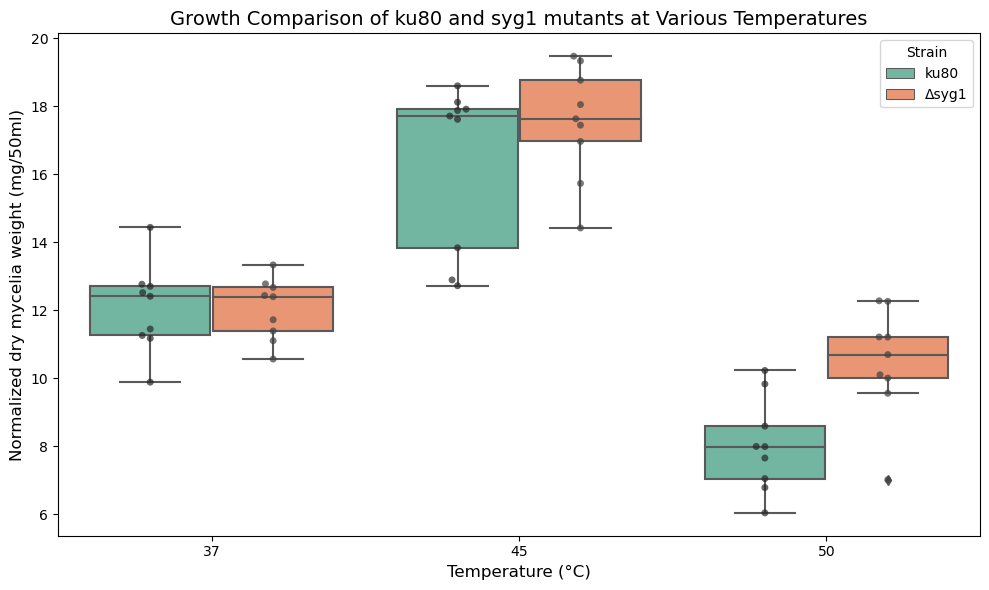

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
file_path = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Mutant_Assay_results/reformatted_ku80_syg1_data_normalized_July_28_2025.csv"
df = pd.read_csv(file_path)

# Ensure Temperature is categorical
df["Temperature"] = df["Temperature"].astype(str)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x="Temperature", y="Growth", hue="Strain", palette="Set2")

# ✅ swarmplot without 'legend=False'
sns.swarmplot(data=df, x="Temperature", y="Growth", hue="Strain", 
              dodge=True, color=".25", alpha=0.7, ax=ax)

# Title and labels
plt.title("Growth Comparison of ku80 and Δsyg1 mutants at Various Temperatures", fontsize=14)
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("Normalized dry mycelia weight (mg/50ml)", fontsize=12)

# Fix the legend: only use the first 2 handles from boxplot
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], title="Strain")

plt.tight_layout()
plt.show()



📊 Two-way ANOVA Results:
                              sum_sq    df           F        PR(>F)
C(Strain)                  19.566987   1.0    7.477825  8.724279e-03
C(Temperature)            546.831730   2.0  104.490078  3.252367e-18
C(Strain):C(Temperature)   13.929329   2.0    2.661654  8.012718e-02
Residual                  125.600074  48.0         NaN           NaN

📌 Tukey HSD Results:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower    upper  reject
---------------------------------------------------------
 ku80_37  ku80_45   4.2993    0.0   2.0361  6.5624   True
 ku80_37  ku80_50  -4.0492    0.0  -6.3124 -1.7861   True
 ku80_37 Δsyg1_37  -0.0226    1.0  -2.2858  2.2406  False
 ku80_37 Δsyg1_45   5.4688    0.0   3.2056   7.732   True
 ku80_37 Δsyg1_50  -1.5844 0.3159  -3.8476  0.6787  False
 ku80_45  ku80_50  -8.3485    0.0 -10.6117 -6.0853   True
 ku80_45 Δsyg1_37  -4.3219    0.0   -6.585 -2.0587   True
 ku80_45 Δsyg1_45   1.1695 

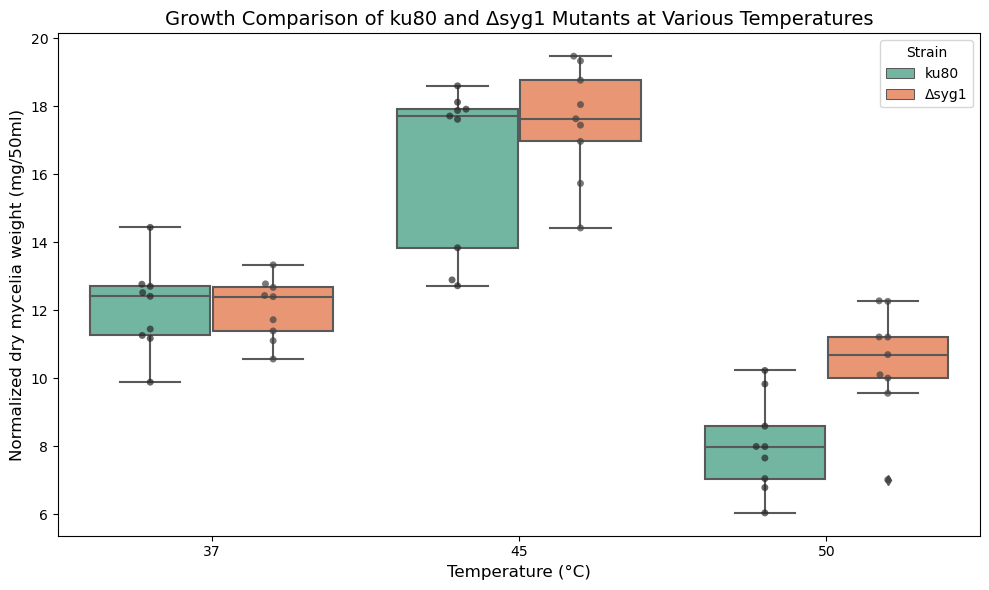

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Load data
file_path = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Mutant_Assay_results/reformatted_ku80_syg1_data_normalized_July_28_2025.csv"
df = pd.read_csv(file_path)

# Ensure correct data types
df["Temperature"] = df["Temperature"].astype(str)
df["Strain"] = df["Strain"].astype(str)

# === Two-Way ANOVA ===
model = ols("Growth ~ C(Strain) * C(Temperature)", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\n📊 Two-way ANOVA Results:")
print(anova_table)

# === Tukey HSD test ===
df["group"] = df["Strain"] + "_" + df["Temperature"]
tukey = pairwise_tukeyhsd(endog=df["Growth"], groups=df["group"], alpha=0.05)
print("\n📌 Tukey HSD Results:")
print(tukey.summary())

# === Plotting ===
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x="Temperature", y="Growth", hue="Strain", palette="Set2")
sns.swarmplot(data=df, x="Temperature", y="Growth", hue="Strain", 
              dodge=True, color=".25", alpha=0.7, ax=ax)

# Fix legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], title="Strain")

# Labels and formatting
plt.title("Growth Comparison of ku80 and Δsyg1 Mutants at Various Temperatures", fontsize=14)
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("Normalized dry mycelia weight (mg/50ml)", fontsize=12)
plt.tight_layout()
plt.show()


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

45_ku80 vs. 45_Δsyg1: t-test independent samples, P_val:2.527e-01 t=-1.187e+00
37_ku80 vs. 37_Δsyg1: t-test independent samples, P_val:9.662e-01 t=4.301e-02
50_ku80 vs. 50_Δsyg1: t-test independent samples, P_val:2.976e-03 t=-3.498e+00


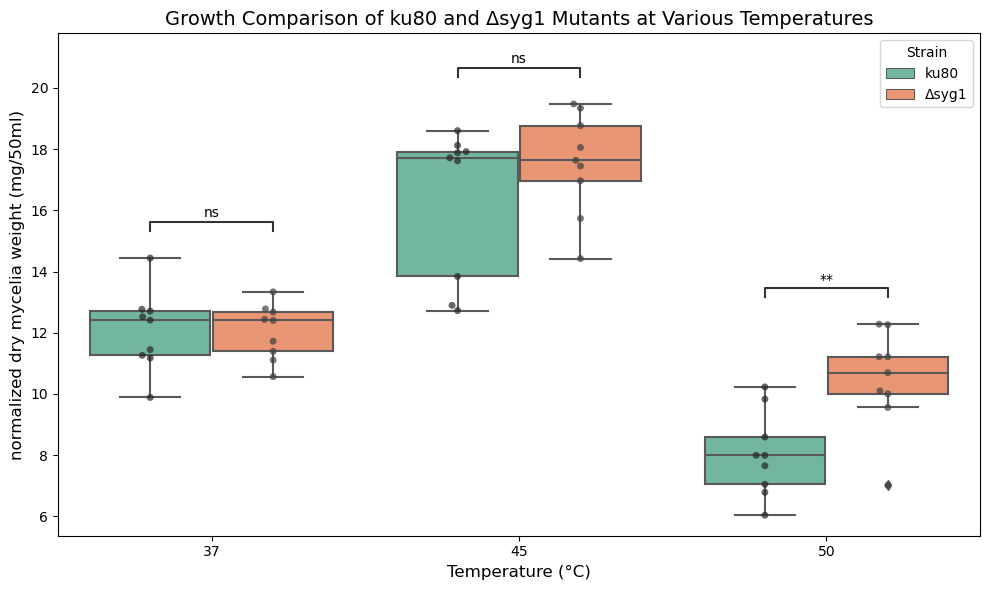

In [6]:
from statannotations.Annotator import Annotator

# Define pairs to compare
pairs = [
    (("37", "ku80"), ("37", "Δsyg1")),
    (("45", "ku80"), ("45", "Δsyg1")),
    (("50", "ku80"), ("50", "Δsyg1"))
]

# Re-plot the base boxplot and swarmplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x="Temperature", y="Growth", hue="Strain", palette="Set2")
sns.swarmplot(data=df, x="Temperature", y="Growth", hue="Strain", 
              dodge=True, color=".25", alpha=0.7, ax=ax)

# Annotator setup
annotator = Annotator(ax, pairs, data=df, x="Temperature", y="Growth", hue="Strain")
annotator.configure(test='t-test_ind', text_format='star', loc='inside', verbose=2)
annotator.apply_and_annotate()

# Fix legend and labels
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], title="Strain")

plt.title("Growth Comparison of ku80 and Δsyg1 Mutants at Various Temperatures", fontsize=14)
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("normalized dry mycelia weight (mg/50ml)", fontsize=12)
plt.tight_layout()
plt.show()

### normalized ku80 vs Δnrc1

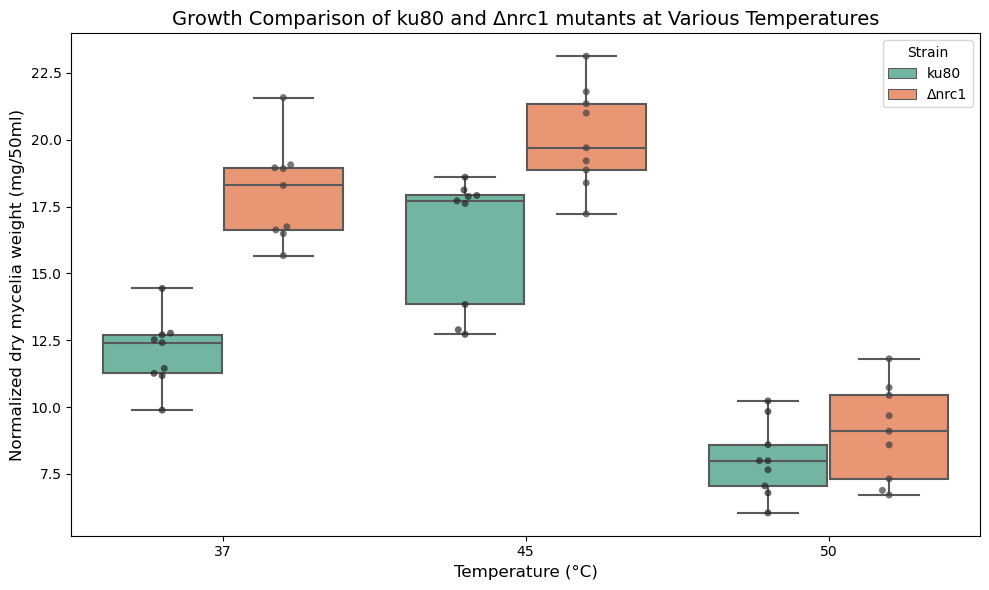

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
file_path = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Mutant_Assay_results/reformatted_ku80_nrc1_data_normalized_July_28_2025.csv"
df = pd.read_csv(file_path)

# Ensure Temperature is categorical
df["Temperature"] = df["Temperature"].astype(str)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x="Temperature", y="Growth", hue="Strain", palette="Set2")

# ✅ swarmplot without 'legend=False'
sns.swarmplot(data=df, x="Temperature", y="Growth", hue="Strain", 
              dodge=True, color=".25", alpha=0.7, ax=ax)

# Title and labels
plt.title("Growth Comparison of ku80 and Δnrc1 mutants at Various Temperatures", fontsize=14)
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("Normalized dry mycelia weight (mg/50ml)", fontsize=12)

# Fix the legend: only use the first 2 handles from boxplot
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], title="Strain")

plt.tight_layout()
plt.show()



📊 Two-way ANOVA Results:
                              sum_sq    df           F        PR(>F)
C(Strain)                 171.271881   1.0   52.192814  3.332104e-09
C(Temperature)            880.431049   2.0  134.149791  2.225476e-20
C(Strain):C(Temperature)   55.520168   2.0    8.459514  7.126257e-04
Residual                  157.513069  48.0         NaN           NaN

📌 Tukey HSD Results:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower    upper  reject
---------------------------------------------------------
 ku80_37  ku80_45   4.2993 0.0001   1.7648  6.8337   True
 ku80_37  ku80_50  -4.0492 0.0003  -6.5837 -1.5148   True
 ku80_37 Δnrc1_37   5.9692    0.0   3.4348  8.5036   True
 ku80_37 Δnrc1_45   8.0074    0.0    5.473 10.5418   True
 ku80_37 Δnrc1_50   -3.041 0.0103  -5.5755 -0.5066   True
 ku80_45  ku80_50  -8.3485    0.0 -10.8829 -5.8141   True
 ku80_45 Δnrc1_37   1.6699 0.3824  -0.8645  4.2044  False
 ku80_45 Δnrc1_45   3.7082 

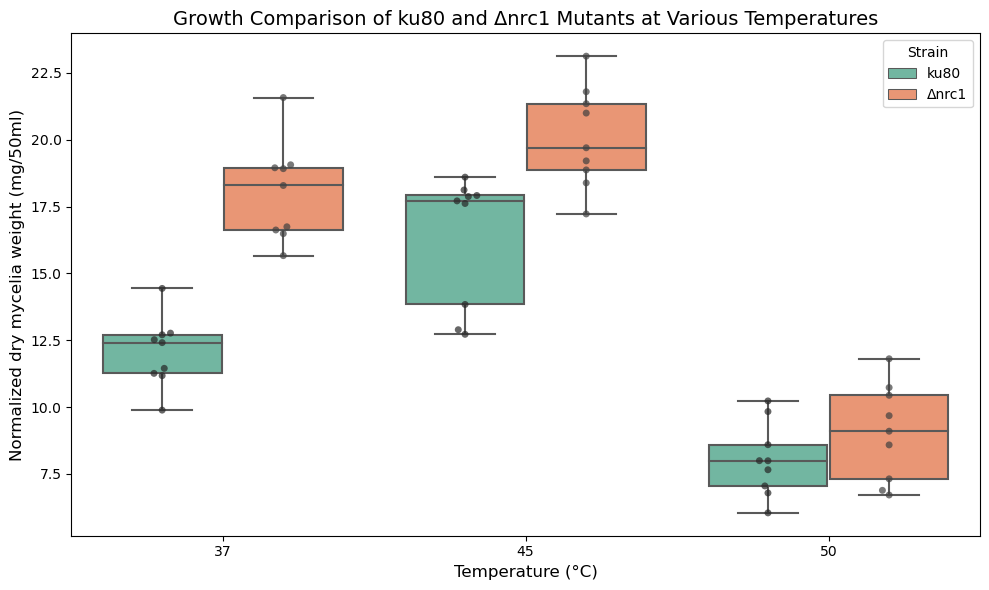

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Load data
file_path = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Mutant_Assay_results/reformatted_ku80_nrc1_data_normalized_July_28_2025.csv"
df = pd.read_csv(file_path)

# Ensure correct data types
df["Temperature"] = df["Temperature"].astype(str)
df["Strain"] = df["Strain"].astype(str)

# === Two-Way ANOVA ===
model = ols("Growth ~ C(Strain) * C(Temperature)", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\n📊 Two-way ANOVA Results:")
print(anova_table)

# === Tukey HSD test ===
df["group"] = df["Strain"] + "_" + df["Temperature"]
tukey = pairwise_tukeyhsd(endog=df["Growth"], groups=df["group"], alpha=0.05)
print("\n📌 Tukey HSD Results:")
print(tukey.summary())

# === Plotting ===
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x="Temperature", y="Growth", hue="Strain", palette="Set2")
sns.swarmplot(data=df, x="Temperature", y="Growth", hue="Strain", 
              dodge=True, color=".25", alpha=0.7, ax=ax)

# Fix legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], title="Strain")

# Labels and formatting
plt.title("Growth Comparison of ku80 and Δnrc1 Mutants at Various Temperatures", fontsize=14)
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("Normalized dry mycelia weight (mg/50ml)", fontsize=12)
plt.tight_layout()
plt.show()


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

45_ku80 vs. 45_Δnrc1: t-test independent samples, P_val:2.347e-03 t=-3.610e+00
37_ku80 vs. 37_Δnrc1: t-test independent samples, P_val:5.841e-07 t=-7.968e+00
50_ku80 vs. 50_Δnrc1: t-test independent samples, P_val:2.010e-01 t=-1.334e+00


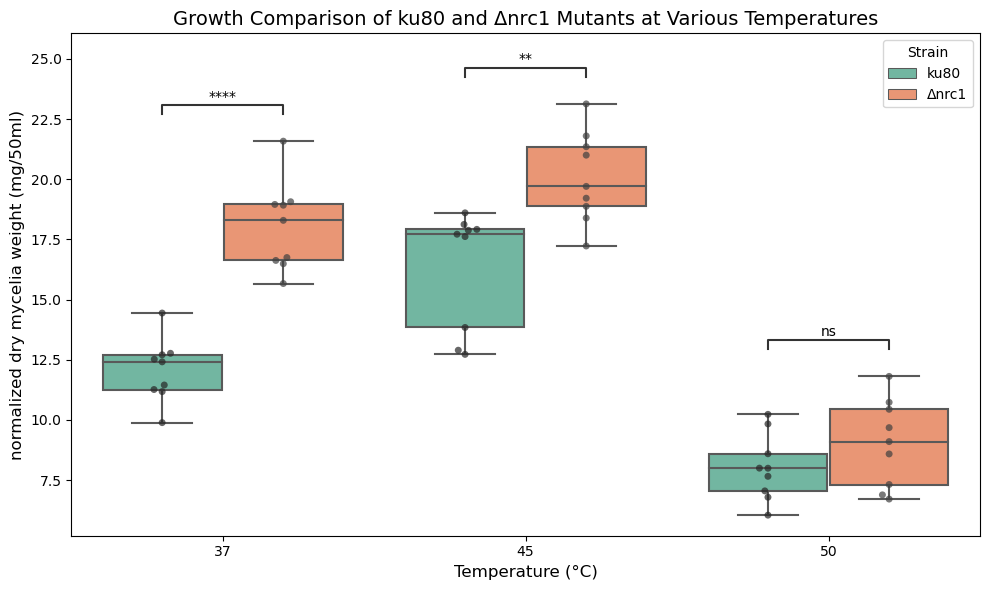

In [15]:
from statannotations.Annotator import Annotator

# Define pairs to compare
pairs = [
    (("37", "ku80"), ("37", "Δnrc1")),
    (("45", "ku80"), ("45", "Δnrc1")),
    (("50", "ku80"), ("50", "Δnrc1"))
]

# Re-plot the base boxplot and swarmplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x="Temperature", y="Growth", hue="Strain", palette="Set2")
sns.swarmplot(data=df, x="Temperature", y="Growth", hue="Strain", 
              dodge=True, color=".25", alpha=0.7, ax=ax)

# Annotator setup
annotator = Annotator(ax, pairs, data=df, x="Temperature", y="Growth", hue="Strain")
annotator.configure(test='t-test_ind', text_format='star', loc='inside', verbose=2)
annotator.apply_and_annotate()

# Fix legend and labels
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], title="Strain")

plt.title("Growth Comparison of ku80 and Δnrc1 Mutants at Various Temperatures", fontsize=14)
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("normalized dry mycelia weight (mg/50ml)", fontsize=12)
plt.tight_layout()
plt.show()

### normalized ku80 vs Δcmr1¶

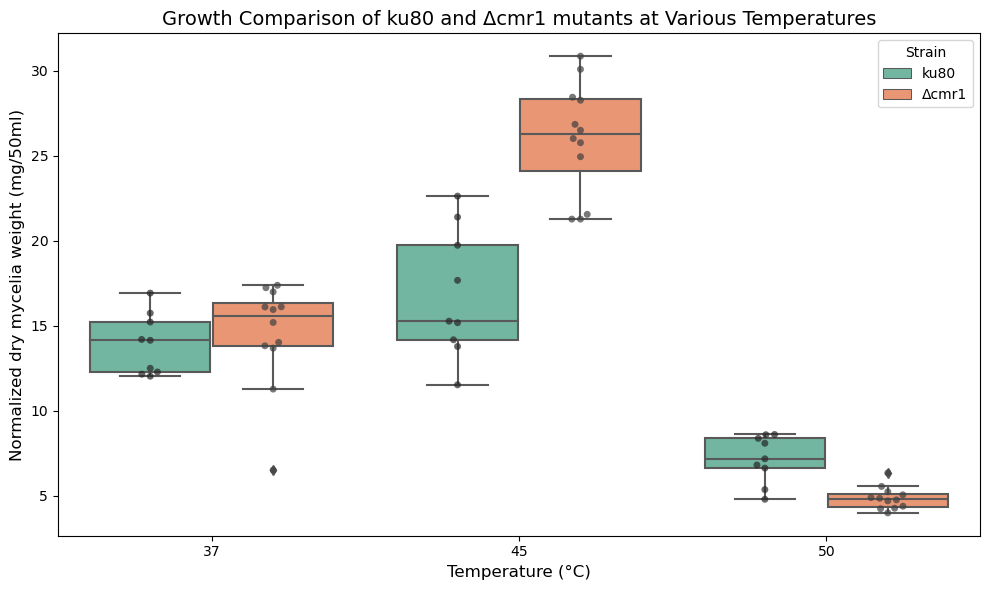

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
file_path = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Mutant_Assay_results/reformatted_ku80_cmr1_data_normalized_July_28_2025.csv"
df = pd.read_csv(file_path)

# Ensure Temperature is categorical
df["Temperature"] = df["Temperature"].astype(str)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x="Temperature", y="Growth", hue="Strain", palette="Set2")

# ✅ swarmplot without 'legend=False'
sns.swarmplot(data=df, x="Temperature", y="Growth", hue="Strain", 
              dodge=True, color=".25", alpha=0.7, ax=ax)

# Title and labels
plt.title("Growth Comparison of ku80 and Δcmr1 mutants at Various Temperatures", fontsize=14)
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("Normalized dry mycelia weight (mg/50ml)", fontsize=12)

# Fix the legend: only use the first 2 handles from boxplot
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], title="Strain")

plt.tight_layout()
plt.show()



📊 Two-way ANOVA Results:
                               sum_sq    df           F        PR(>F)
C(Strain)                   95.908984   1.0   14.292669  3.767698e-04
C(Temperature)            2762.033770   2.0  205.803632  8.401879e-27
C(Strain):C(Temperature)   365.645787   2.0   27.244863  4.968671e-09
Residual                   382.490637  57.0         NaN           NaN

📌 Tukey HSD Results:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1   group2  meandiff p-adj   lower    upper   reject
----------------------------------------------------------
 ku80_37  ku80_45   2.9082 0.1801  -0.6928   6.5091  False
 ku80_37  ku80_50  -6.7514    0.0 -10.3523  -3.1504   True
 ku80_37 Δcmr1_37   0.6142 0.9943  -2.7542   3.9826  False
 ku80_37 Δcmr1_45  12.0769    0.0   8.7085  15.4453   True
 ku80_37 Δcmr1_50  -9.0545    0.0 -12.4229  -5.6861   True
 ku80_45  ku80_50  -9.6595    0.0 -13.2605  -6.0586   True
 ku80_45 Δcmr1_37  -2.2939 0.3506  -5.6623   1.0745  False
 ku80_45 Δcm

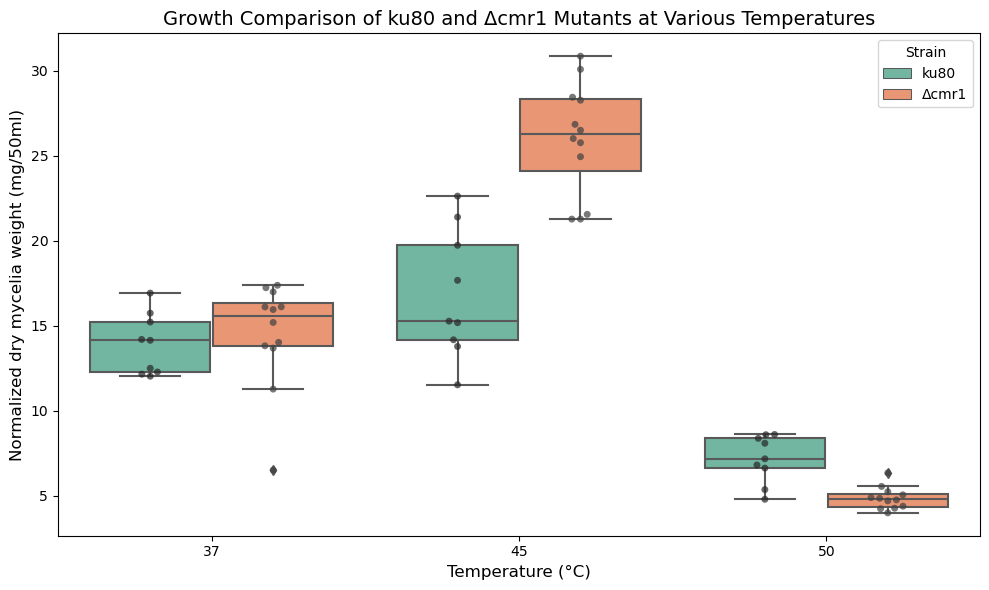

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Load data
file_path = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Mutant_Assay_results/reformatted_ku80_cmr1_data_normalized_July_28_2025.csv"
df = pd.read_csv(file_path)

# Ensure correct data types
df["Temperature"] = df["Temperature"].astype(str)
df["Strain"] = df["Strain"].astype(str)

# === Two-Way ANOVA ===
model = ols("Growth ~ C(Strain) * C(Temperature)", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\n📊 Two-way ANOVA Results:")
print(anova_table)

# === Tukey HSD test ===
df["group"] = df["Strain"] + "_" + df["Temperature"]
tukey = pairwise_tukeyhsd(endog=df["Growth"], groups=df["group"], alpha=0.05)
print("\n📌 Tukey HSD Results:")
print(tukey.summary())

# === Plotting ===
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x="Temperature", y="Growth", hue="Strain", palette="Set2")
sns.swarmplot(data=df, x="Temperature", y="Growth", hue="Strain", 
              dodge=True, color=".25", alpha=0.7, ax=ax)

# Fix legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], title="Strain")

# Labels and formatting
plt.title("Growth Comparison of ku80 and Δcmr1 Mutants at Various Temperatures", fontsize=14)
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("Normalized dry mycelia weight (mg/50ml)", fontsize=12)
plt.tight_layout()
plt.show()


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

45_ku80 vs. 45_Δcmr1: t-test independent samples, P_val:9.764e-06 t=-5.961e+00
37_ku80 vs. 37_Δcmr1: t-test independent samples, P_val:6.019e-01 t=-5.306e-01
50_ku80 vs. 50_Δcmr1: t-test independent samples, P_val:7.112e-05 t=5.050e+00


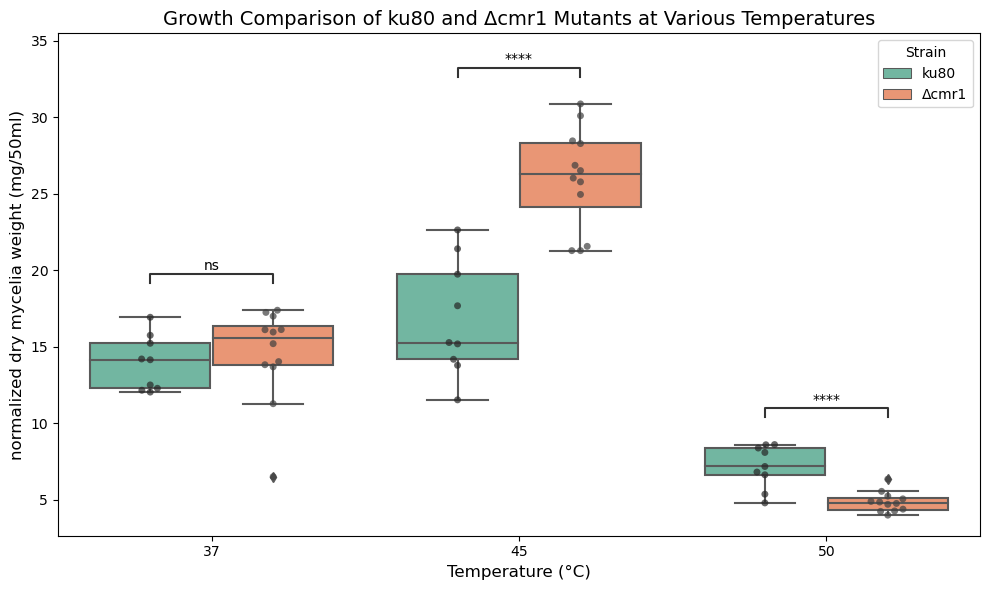

In [18]:
from statannotations.Annotator import Annotator

# Define pairs to compare
pairs = [
    (("37", "ku80"), ("37", "Δcmr1")),
    (("45", "ku80"), ("45", "Δcmr1")),
    (("50", "ku80"), ("50", "Δcmr1"))
]

# Re-plot the base boxplot and swarmplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x="Temperature", y="Growth", hue="Strain", palette="Set2")
sns.swarmplot(data=df, x="Temperature", y="Growth", hue="Strain", 
              dodge=True, color=".25", alpha=0.7, ax=ax)

# Annotator setup
annotator = Annotator(ax, pairs, data=df, x="Temperature", y="Growth", hue="Strain")
annotator.configure(test='t-test_ind', text_format='star', loc='inside', verbose=2)
annotator.apply_and_annotate()

# Fix legend and labels
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], title="Strain")

plt.title("Growth Comparison of ku80 and Δcmr1 Mutants at Various Temperatures", fontsize=14)
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("normalized dry mycelia weight (mg/50ml)", fontsize=12)
plt.tight_layout()
plt.show()

### normalized ku80 vs Δptp3¶


📊 Two-way ANOVA Results:
                               sum_sq    df          F        PR(>F)
C(Strain)                  310.776011   1.0  11.309663  1.383049e-03
C(Temperature)            3090.331702   2.0  56.231189  3.264709e-14
C(Strain):C(Temperature)   430.748068   2.0   7.837824  9.836699e-04
Residual                  1566.291863  57.0        NaN           NaN

📌 Tukey HSD Results:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1   group2  meandiff p-adj   lower    upper   reject
----------------------------------------------------------
 ku80_37  ku80_45   2.9082 0.8459  -4.3788  10.1951  False
 ku80_37  ku80_50  -6.7514 0.0845 -14.0383   0.5356  False
 ku80_37 Δptp3_37   4.1769 0.4696  -2.6394  10.9932  False
 ku80_37 Δptp3_45  14.0176    0.0   7.2013  20.8339   True
 ku80_37 Δptp3_50  -8.5734  0.006 -15.3897  -1.7571   True
 ku80_45  ku80_50  -9.6595 0.0032 -16.9465  -2.3726   True
 ku80_45 Δptp3_37   1.2687 0.9938  -5.5476    8.085  False
 ku80_45 Δptp3_45

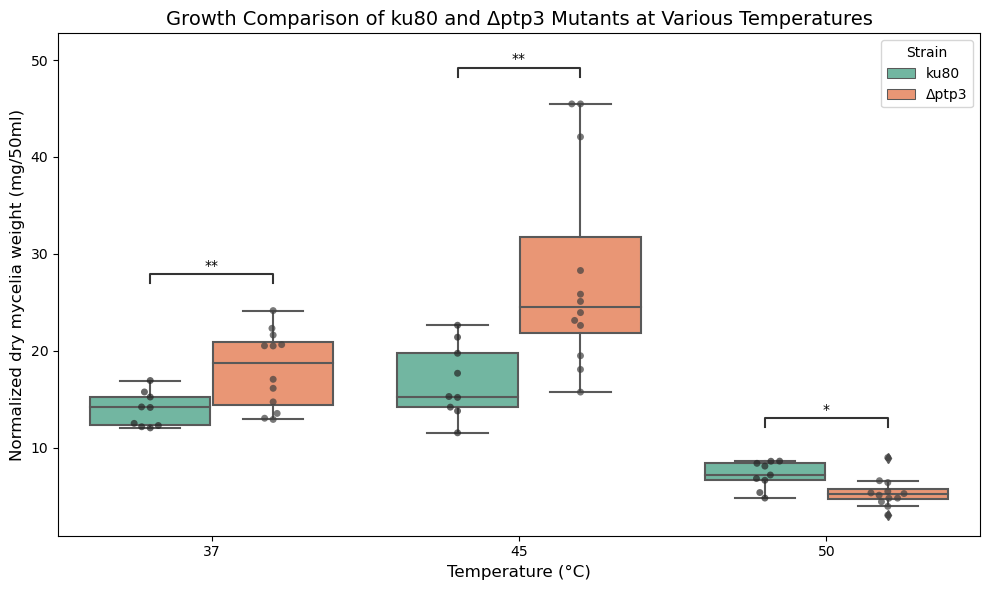

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statannotations.Annotator import Annotator

# === Load data ===
file_path = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Mutant_Assay_results/reformatted_ku80_ptp3_data_normalized_July_28_2025.csv"
df = pd.read_csv(file_path)

# === Tidy / types ===
df["Temperature"] = df["Temperature"].astype(str).str.strip()
df["Strain"] = df["Strain"].astype(str).str.strip()

# Normalize strain naming so 'ptp3' or 'delta_ptp3' appear as 'Δptp3'
strain_map = {
    "ptp3": "Δptp3",
    "delta_ptp3": "Δptp3",
    "Delta_ptp3": "Δptp3",
    "Δptp3": "Δptp3",
    "ku80": "ku80",
    "KU80": "ku80"
}
df["Strain"] = df["Strain"].map(lambda s: strain_map.get(s, s))

# === Two-Way ANOVA ===
model = ols("Growth ~ C(Strain) * C(Temperature)", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\n📊 Two-way ANOVA Results:")
print(anova_table)

# (optional) save ANOVA
anova_table.to_csv("anova_ku80_ptp3.csv")

# === Tukey HSD ===
df["group"] = df["Strain"] + "_" + df["Temperature"]
tukey = pairwise_tukeyhsd(endog=df["Growth"], groups=df["group"], alpha=0.05)
print("\n📌 Tukey HSD Results:")
print(tukey.summary())

# (optional) save Tukey summary table
tukey_df = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])
tukey_df.to_csv("tukey_ku80_ptp3.csv", index=False)

# === Figure: box + swarm + stats annotations ===
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x="Temperature", y="Growth", hue="Strain", palette="Set2")
sns.swarmplot(data=df, x="Temperature", y="Growth", hue="Strain",
              dodge=True, color=".25", alpha=0.7, ax=ax)

# Fix legend to one set of handles (avoid duplicates from swarm)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], title="Strain")

# Define per-temperature comparisons (ku80 vs Δptp3 at each temperature present)
temps = sorted(df["Temperature"].unique(), key=lambda t: float(t) if t.replace('.','',1).isdigit() else t)
pairs = [((t, "ku80"), (t, "Δptp3")) for t in temps if "ku80" in df["Strain"].unique() and "Δptp3" in df["Strain"].unique()]

annotator = Annotator(ax, pairs, data=df, x="Temperature", y="Growth", hue="Strain")
annotator.configure(test='t-test_ind', text_format='star', loc='inside', verbose=0)
annotator.apply_and_annotate()

plt.title("Growth Comparison of ku80 and Δptp3 Mutants at Various Temperatures", fontsize=14)
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("Normalized dry mycelia weight (mg/50ml)", fontsize=12)
plt.tight_layout()
plt.show()


### normalized ku80 vs Δmfs (37 oC pergermination)


📊 Two-way ANOVA Results:
                               sum_sq    df          F        PR(>F)
C(Strain)                  189.500326   1.0  10.234247  3.246113e-03
C(Temperature)            1034.933340   2.0  27.946558  1.404247e-07
C(Strain):C(Temperature)   251.465114   2.0   6.790374  3.693164e-03
Residual                   555.488805  30.0        NaN           NaN

📌 Tukey HSD Results:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1  group2 meandiff p-adj   lower    upper   reject
--------------------------------------------------------
ku80_37 ku80_45   2.5186 0.9097  -5.0378   10.075  False
ku80_37 ku80_50  -4.3029 0.5225 -11.8594   3.2535  False
ku80_37 Δmfs_37   2.8904 0.8503   -4.666  10.4469  False
ku80_37 Δmfs_45  14.2609    0.0   6.7045  21.8174   True
ku80_37 Δmfs_50  -5.1698 0.3238 -12.7262   2.3867  False
ku80_45 ku80_50  -6.8215 0.0954  -14.378   0.7349  False
ku80_45 Δmfs_37   0.3718    1.0  -7.1846   7.9283  False
ku80_45 Δmfs_45  11.7423 0.0007   4.1

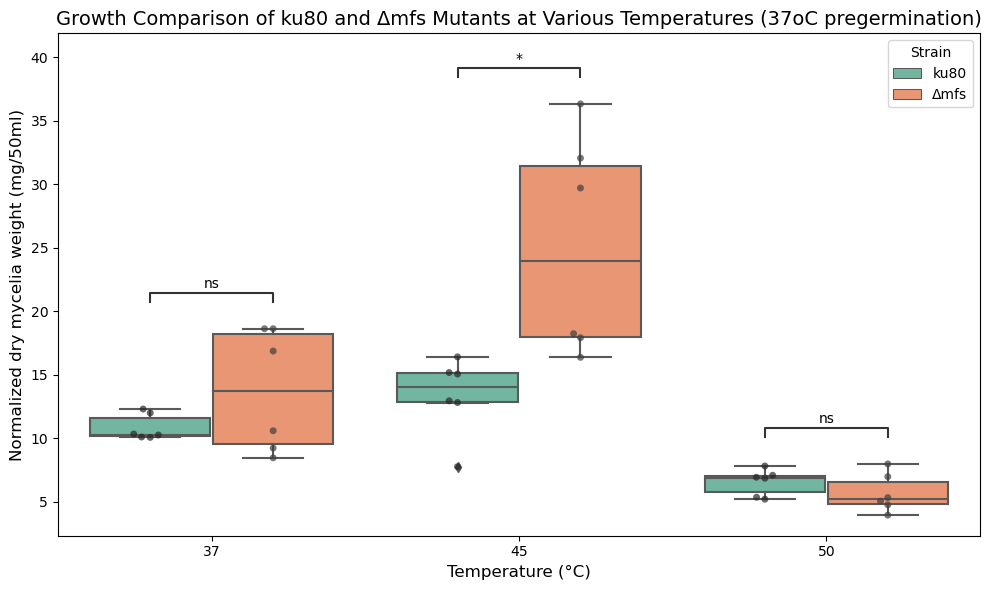

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statannotations.Annotator import Annotator

# === Load data ===
file_path = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Mutant_Assay_results/reformatted_ku80_mfs_growth_37_pregerm_normalized.csv"
df = pd.read_csv(file_path)

# === Tidy / types ===
df["Temperature"] = df["Temperature"].astype(str).str.strip()
df["Strain"] = df["Strain"].astype(str).str.strip()

# Normalize strain naming so 'mfs' or 'delta_mfs' appear as 'Δmfs'
strain_map = {
    "mfs": "Δmfs",
    "delta_mfs": "Δmfs",
    "Delta_mfs": "Δmfs",
    "Δmfs": "Δmfs",
    "ku80": "ku80",
    "KU80": "ku80"
}
df["Strain"] = df["Strain"].map(lambda s: strain_map.get(s, s))

# === Two-Way ANOVA ===
model = ols("Growth ~ C(Strain) * C(Temperature)", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\n📊 Two-way ANOVA Results:")
print(anova_table)

# (optional) save ANOVA
#anova_table.to_csv("anova_ku80_mfs.csv")

# === Tukey HSD ===
df["group"] = df["Strain"] + "_" + df["Temperature"]
tukey = pairwise_tukeyhsd(endog=df["Growth"], groups=df["group"], alpha=0.05)
print("\n📌 Tukey HSD Results:")
print(tukey.summary())

# (optional) save Tukey summary table
tukey_df = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])
#tukey_df.to_csv("tukey_ku80_ptp3.csv", index=False)

# === Figure: box + swarm + stats annotations ===
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x="Temperature", y="Growth", hue="Strain", palette="Set2")
sns.swarmplot(data=df, x="Temperature", y="Growth", hue="Strain",
              dodge=True, color=".25", alpha=0.7, ax=ax)

# Fix legend to one set of handles (avoid duplicates from swarm)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], title="Strain")

# Define per-temperature comparisons (ku80 vs Δptp3 at each temperature present)
temps = sorted(df["Temperature"].unique(), key=lambda t: float(t) if t.replace('.','',1).isdigit() else t)
pairs = [((t, "ku80"), (t, "Δmfs")) for t in temps if "ku80" in df["Strain"].unique() and "Δmfs" in df["Strain"].unique()]

annotator = Annotator(ax, pairs, data=df, x="Temperature", y="Growth", hue="Strain")
annotator.configure(test='t-test_ind', text_format='star', loc='inside', verbose=0)
annotator.apply_and_annotate()

plt.title("Growth Comparison of ku80 and Δmfs Mutants at Various Temperatures (37oC pregermination)", fontsize=14)
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("Normalized dry mycelia weight (mg/50ml)", fontsize=12)
plt.tight_layout()
plt.show()


### normalized ku80 vs Δmfs (45 oC pergermination)


📊 Two-way ANOVA Results:
                              sum_sq    df          F        PR(>F)
C(Strain)                   3.727928   1.0   1.175344  2.869422e-01
C(Temperature)            189.518098   2.0  29.875698  7.264414e-08
C(Strain):C(Temperature)    5.107294   2.0   0.805116  4.564610e-01
Residual                   95.153307  30.0        NaN           NaN

📌 Tukey HSD Results:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
ku80_37 ku80_45    3.858 0.0089  0.7305  6.9855   True
ku80_37 ku80_50   -0.671 0.9857 -3.7985  2.4564  False
ku80_37 Δmfs_37   0.9835 0.9279  -2.144  4.1109  False
ku80_37 Δmfs_45   5.2061 0.0003  2.0786  8.3335   True
ku80_37 Δmfs_50  -1.0718 0.8996 -4.1992  2.0557  False
ku80_45 ku80_50   -4.529 0.0016 -7.6565 -1.4016   True
ku80_45 Δmfs_37  -2.8745 0.0859  -6.002  0.2529  False
ku80_45 Δmfs_45   1.3481 0.7767 -1.7794  4.4755  False
ku80_45

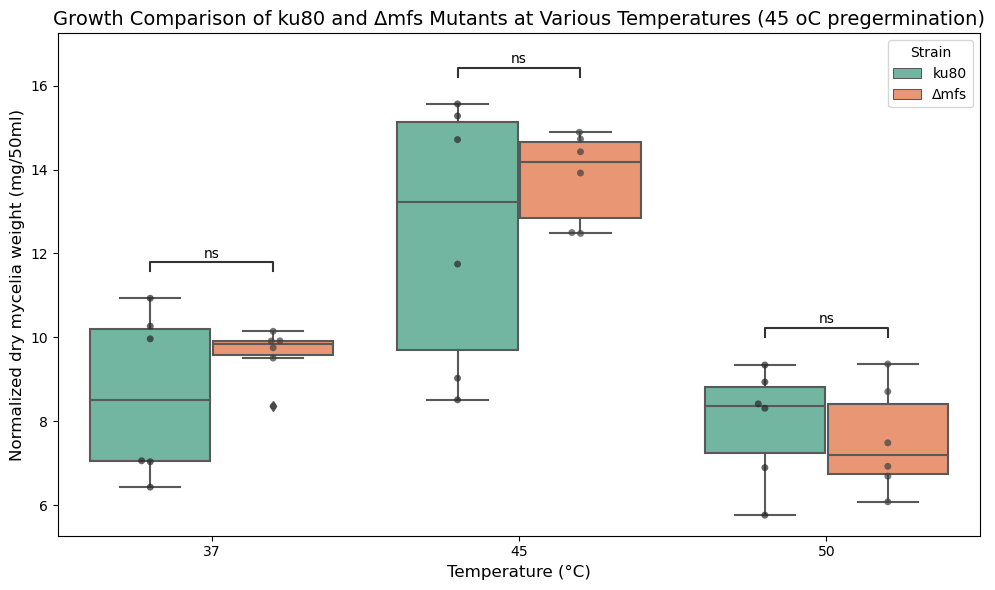

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statannotations.Annotator import Annotator

# === Load data ===
file_path = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Mutant_Assay_results/reformatted_ku80_mfs_growth_45_pregerm_normalized.csv"
df = pd.read_csv(file_path)

# === Tidy / types ===
df["Temperature"] = df["Temperature"].astype(str).str.strip()
df["Strain"] = df["Strain"].astype(str).str.strip()

# Normalize strain naming so 'mfs' or 'delta_mfs' appear as 'Δmfs'
strain_map = {
    "mfs": "Δmfs",
    "delta_mfs": "Δmfs",
    "Delta_mfs": "Δmfs",
    "Δmfs": "Δmfs",
    "ku80": "ku80",
    "KU80": "ku80"
}
df["Strain"] = df["Strain"].map(lambda s: strain_map.get(s, s))

# === Two-Way ANOVA ===
model = ols("Growth ~ C(Strain) * C(Temperature)", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\n📊 Two-way ANOVA Results:")
print(anova_table)

# (optional) save ANOVA
#anova_table.to_csv("anova_ku80_mfs.csv")

# === Tukey HSD ===
df["group"] = df["Strain"] + "_" + df["Temperature"]
tukey = pairwise_tukeyhsd(endog=df["Growth"], groups=df["group"], alpha=0.05)
print("\n📌 Tukey HSD Results:")
print(tukey.summary())

# (optional) save Tukey summary table
tukey_df = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])
#tukey_df.to_csv("tukey_ku80_ptp3.csv", index=False)

# === Figure: box + swarm + stats annotations ===
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x="Temperature", y="Growth", hue="Strain", palette="Set2")
sns.swarmplot(data=df, x="Temperature", y="Growth", hue="Strain",
              dodge=True, color=".25", alpha=0.7, ax=ax)

# Fix legend to one set of handles (avoid duplicates from swarm)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], title="Strain")

# Define per-temperature comparisons (ku80 vs Δptp3 at each temperature present)
temps = sorted(df["Temperature"].unique(), key=lambda t: float(t) if t.replace('.','',1).isdigit() else t)
pairs = [((t, "ku80"), (t, "Δmfs")) for t in temps if "ku80" in df["Strain"].unique() and "Δmfs" in df["Strain"].unique()]

annotator = Annotator(ax, pairs, data=df, x="Temperature", y="Growth", hue="Strain")
annotator.configure(test='t-test_ind', text_format='star', loc='inside', verbose=0)
annotator.apply_and_annotate()

plt.title("Growth Comparison of ku80 and Δmfs Mutants at Various Temperatures (45 oC pregermination)", fontsize=14)
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("Normalized dry mycelia weight (mg/50ml)", fontsize=12)
plt.tight_layout()
plt.show()


### normalized ku80 vs Δzip (37 oC pergermination)


📊 Two-way ANOVA Results:
                               sum_sq    df          F        PR(>F)
C(Strain)                  696.258302   1.0  22.924155  4.237754e-05
C(Temperature)            1384.205178   2.0  22.787329  9.575819e-07
C(Strain):C(Temperature)   429.110399   2.0   7.064184  3.062322e-03
Residual                   911.167673  30.0        NaN           NaN

📌 Tukey HSD Results:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1  group2 meandiff p-adj   lower    upper   reject
--------------------------------------------------------
ku80_37 ku80_45   2.5186 0.9668  -7.1593  12.1965  False
ku80_37 ku80_50  -4.3029 0.7539 -13.9808   5.3749  False
ku80_37 Δzip_37   7.3674 0.2194  -2.3105  17.0452  False
ku80_37 Δzip_45  20.3942    0.0  10.7163   30.072   True
ku80_37 Δzip_50  -3.1592 0.9166  -12.837   6.5187  False
ku80_45 ku80_50  -6.8215 0.2931 -16.4994   2.8563  False
ku80_45 Δzip_37   4.8488 0.6522  -4.8291  14.5266  False
ku80_45 Δzip_45  17.8756 0.0001   8.1

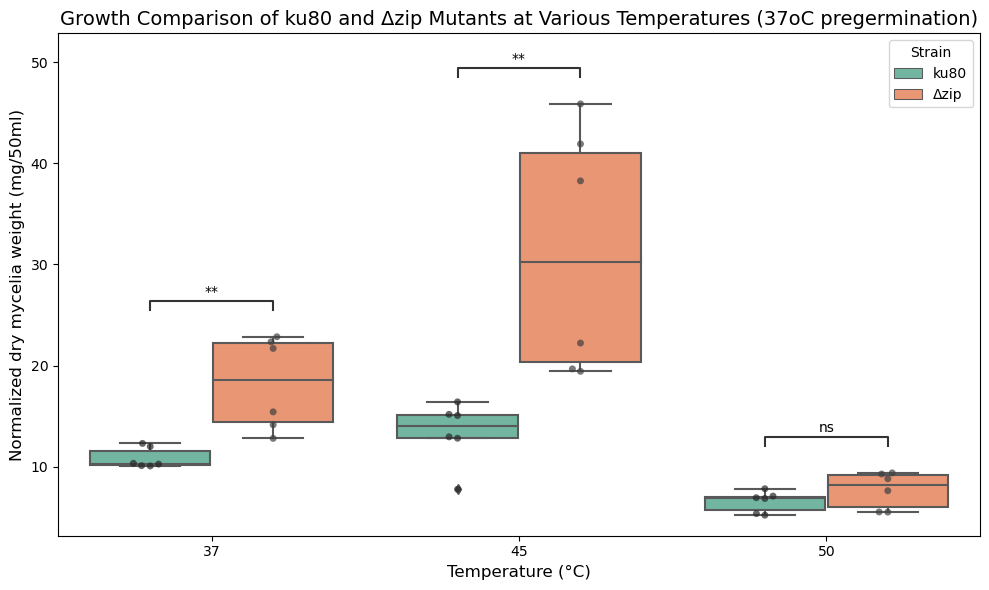

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statannotations.Annotator import Annotator

# === Load data ===
file_path = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Mutant_Assay_results/reformatted_ku80_zip_growth_37_pregerm_normalized.csv"
df = pd.read_csv(file_path)

# === Tidy / types ===
df["Temperature"] = df["Temperature"].astype(str).str.strip()
df["Strain"] = df["Strain"].astype(str).str.strip()

# Normalize strain naming so 'mfs' or 'delta_mfs' appear as 'Δmfs'
strain_map = {
    "zip": "Δzip",
    "delta_zip": "Δzip",
    "Delta_zip": "Δzip",
    "Δzip": "Δzip",
    "ku80": "ku80",
    "KU80": "ku80"
}
df["Strain"] = df["Strain"].map(lambda s: strain_map.get(s, s))

# === Two-Way ANOVA ===
model = ols("Growth ~ C(Strain) * C(Temperature)", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\n📊 Two-way ANOVA Results:")
print(anova_table)

# (optional) save ANOVA
#anova_table.to_csv("anova_ku80_mfs.csv")

# === Tukey HSD ===
df["group"] = df["Strain"] + "_" + df["Temperature"]
tukey = pairwise_tukeyhsd(endog=df["Growth"], groups=df["group"], alpha=0.05)
print("\n📌 Tukey HSD Results:")
print(tukey.summary())

# (optional) save Tukey summary table
tukey_df = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])
#tukey_df.to_csv("tukey_ku80_ptp3.csv", index=False)

# === Figure: box + swarm + stats annotations ===
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x="Temperature", y="Growth", hue="Strain", palette="Set2")
sns.swarmplot(data=df, x="Temperature", y="Growth", hue="Strain",
              dodge=True, color=".25", alpha=0.7, ax=ax)

# Fix legend to one set of handles (avoid duplicates from swarm)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], title="Strain")

# Define per-temperature comparisons (ku80 vs Δzip at each temperature present)
temps = sorted(df["Temperature"].unique(), key=lambda t: float(t) if t.replace('.','',1).isdigit() else t)
pairs = [((t, "ku80"), (t, "Δzip")) for t in temps if "ku80" in df["Strain"].unique() and "Δzip" in df["Strain"].unique()]

annotator = Annotator(ax, pairs, data=df, x="Temperature", y="Growth", hue="Strain")
annotator.configure(test='t-test_ind', text_format='star', loc='inside', verbose=0)
annotator.apply_and_annotate()

plt.title("Growth Comparison of ku80 and Δzip Mutants at Various Temperatures (37oC pregermination)", fontsize=14)
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("Normalized dry mycelia weight (mg/50ml)", fontsize=12)
plt.tight_layout()
plt.show()



📊 Two-way ANOVA Results:
                              sum_sq    df          F        PR(>F)
C(Strain)                   1.494310   1.0   0.368616  5.483275e-01
C(Temperature)            186.381409   2.0  22.988277  8.843515e-07
C(Strain):C(Temperature)    7.305481   2.0   0.901058  4.168489e-01
Residual                  121.615078  30.0        NaN           NaN

📌 Tukey HSD Results:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
ku80_37 ku80_45    3.858 0.0261  0.3223  7.3937   True
ku80_37 ku80_50   -0.671 0.9918 -4.2067  2.8646  False
ku80_37 Δzip_37   0.3129 0.9998 -3.2228  3.8486  False
ku80_37 Δzip_45   4.0005 0.0194  0.4648  7.5361   True
ku80_37 Δzip_50  -2.3488 0.3549 -5.8845  1.1868  False
ku80_45 ku80_50   -4.529 0.0061 -8.0647 -0.9934   True
ku80_45 Δzip_37  -3.5451 0.0491 -7.0808 -0.0094   True
ku80_45 Δzip_45   0.1425    1.0 -3.3932  3.6781  False
ku80_45

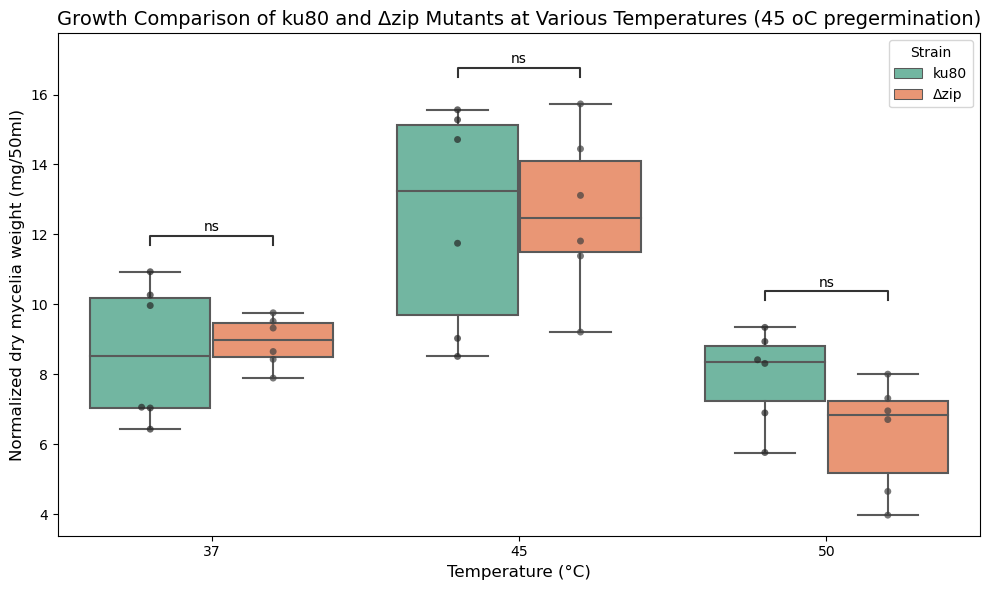

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statannotations.Annotator import Annotator

# === Load data ===
file_path = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Mutant_Assay_results/reformatted_ku80_zip_growth_45_pregerm_normalized.csv"
df = pd.read_csv(file_path)

# === Tidy / types ===
df["Temperature"] = df["Temperature"].astype(str).str.strip()
df["Strain"] = df["Strain"].astype(str).str.strip()

# Normalize strain naming so 'mfs' or 'delta_mfs' appear as 'Δmfs'
strain_map = {
    "zip": "Δzip",
    "delta_zip": "Δzip",
    "Delta_zip": "Δzip",
    "Δzip": "Δzip",
    "ku80": "ku80",
    "KU80": "ku80"
}
df["Strain"] = df["Strain"].map(lambda s: strain_map.get(s, s))

# === Two-Way ANOVA ===
model = ols("Growth ~ C(Strain) * C(Temperature)", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\n📊 Two-way ANOVA Results:")
print(anova_table)

# (optional) save ANOVA
#anova_table.to_csv("anova_ku80_mfs.csv")

# === Tukey HSD ===
df["group"] = df["Strain"] + "_" + df["Temperature"]
tukey = pairwise_tukeyhsd(endog=df["Growth"], groups=df["group"], alpha=0.05)
print("\n📌 Tukey HSD Results:")
print(tukey.summary())

# (optional) save Tukey summary table
tukey_df = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])
#tukey_df.to_csv("tukey_ku80_ptp3.csv", index=False)

# === Figure: box + swarm + stats annotations ===
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x="Temperature", y="Growth", hue="Strain", palette="Set2")
sns.swarmplot(data=df, x="Temperature", y="Growth", hue="Strain",
              dodge=True, color=".25", alpha=0.7, ax=ax)

# Fix legend to one set of handles (avoid duplicates from swarm)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], title="Strain")

# Define per-temperature comparisons (ku80 vs Δzip at each temperature present)
temps = sorted(df["Temperature"].unique(), key=lambda t: float(t) if t.replace('.','',1).isdigit() else t)
pairs = [((t, "ku80"), (t, "Δzip")) for t in temps if "ku80" in df["Strain"].unique() and "Δzip" in df["Strain"].unique()]

annotator = Annotator(ax, pairs, data=df, x="Temperature", y="Growth", hue="Strain")
annotator.configure(test='t-test_ind', text_format='star', loc='inside', verbose=0)
annotator.apply_and_annotate()

plt.title("Growth Comparison of ku80 and Δzip Mutants at Various Temperatures (45 oC pregermination)", fontsize=14)
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("Normalized dry mycelia weight (mg/50ml)", fontsize=12)
plt.tight_layout()
plt.show()
